In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_context('paper') # paper


In [2]:
VARIABLES = [
            'Young', 'Old', 'Male', 'Female', 'Left', 'Right', 'Poor', 'Rich',
        ]
N = len(VARIABLES)

YEARS = range(2016, 2021)

TITLE2PAIR = {
     'Age': ('Young', 'Old'),
     'Gender': ('Male', 'Female'),
     'Affluence': ('Poor', 'Rich'),
     'Leaning': ('Left', 'Right'),
}

In [3]:
PALETTE = sns.color_palette()
COLOR_PAIRS = list(zip(PALETTE[::2], PALETTE[1::2]))

In [5]:
def plot(df, output_path):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
    axes = [a for aa in axes for a in aa]
    legend = []
    for (title_pair, CLASS_PAIR), ax, colors in zip(TITLE2PAIR.items(), axes, COLOR_PAIRS):
        a, b = CLASS_PAIR
        for c1, c2, color, linestyle in (
                (a, b, colors[0], ':'),
                (b, a, colors[1], ':'),
                (a, a, colors[0], '-'),
                (b, b, colors[1], '-'),
        ):
            line_df = df[(df.class_child == c1) & (df.class_parent == c2)].sort_values(by='year')
            ax.errorbar(line_df.year,
                         line_df.param,
                         yerr=line_df[['down_err', 'up_err']].T.values,
                         label=fr'{c1} $\rightarrow$ {c2}',
                         linewidth=4, elinewidth=2,
                         color=color, linestyle=linestyle)
            legend += [(fr'{c1} $\rightarrow$ {c2}',
                        Line2D([0], [0], color=color, lw=4, linestyle=linestyle))]
            ax.plot(YEARS, np.zeros(len(YEARS)), alpha=0.5, color='k')
            ax.set_xticks(YEARS)
        legend += [("", Line2D([],[],linestyle=''))]
        ax.set_title(title_pair, fontsize=13.5)

    plt.subplots_adjust(wspace=0.1, hspace=0.15)

    plt.legend([line for label, line in legend],
               [label for label, line in legend],
               bbox_to_anchor=(1., 1.9), fontsize=12.5)
    
    plt.savefig(output_path, bbox_inches='tight')
    plt.savefig(output_path.replace('.pdf', '.png'), bbox_inches='tight')

In [6]:
! mkdir -p ../paper/fig

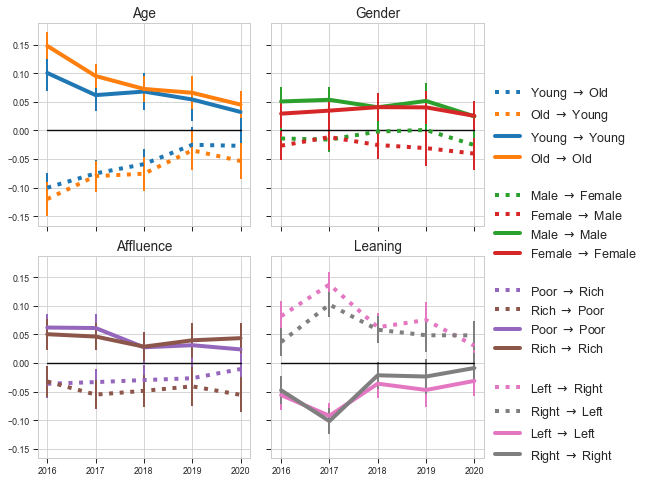

In [7]:
df = pd.read_csv("../data/results/sd-model-regression-results.csv")
plot(df, '../paper/fig/homophily-heterophily-in-time.pdf')

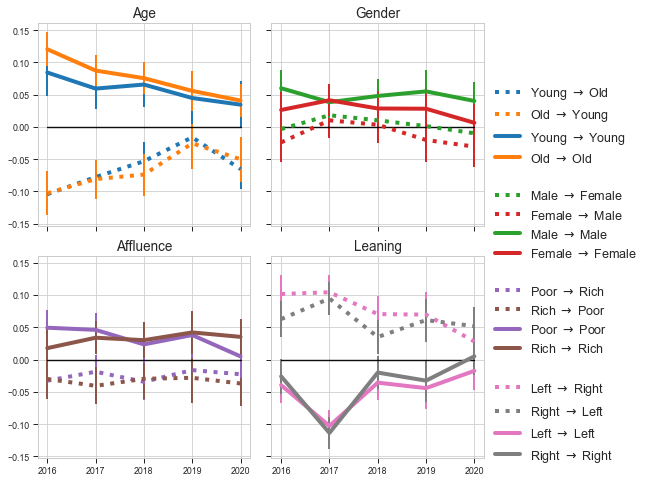

In [8]:
df = pd.read_csv("../data/results/sd-topics-model-regression-results.csv")
plot(df, '../paper/fig/homophily-heterophily-in-time-with-topics.pdf')